Assignment 6 - Maryam Gheith - 5945

# Assignment 6: Investigate a Pima Indians Diabetes Dataset

- #### You should work individually.

- #### You are encouraged to ask any questions on teams, or in person.

- #### You are required to submit a jupyter file of your answers in teams before next Friday 27 May 2022 at 11:59 PM.

- #### Make sure to write your name and ID.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#bonus">Bonus</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler as StandardScaler
import sklearn.model_selection as model_selection
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

Check for missing values

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for duplicates

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
data.duplicated().sum()

0

Checking for outliers

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Number of diabetic and non-diabetic patients

### Age Ranges

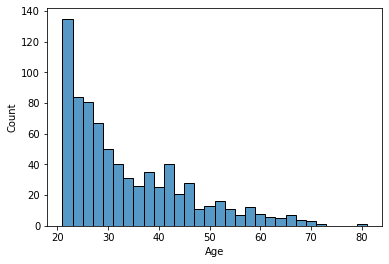

In [11]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.histplot(data['Age'],bins=30)
plt.show()

Visualizing each col with outcome

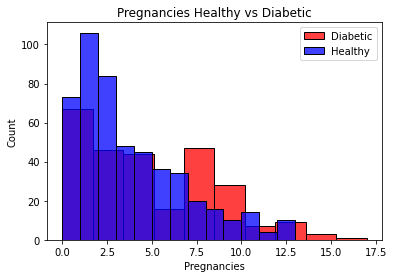

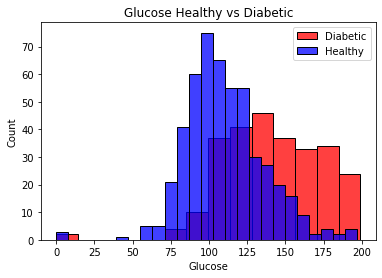

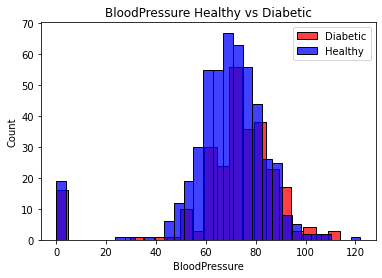

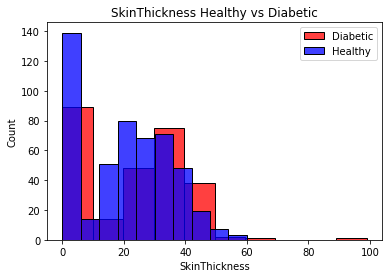

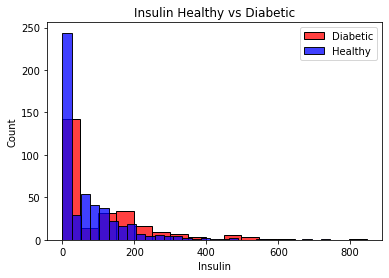

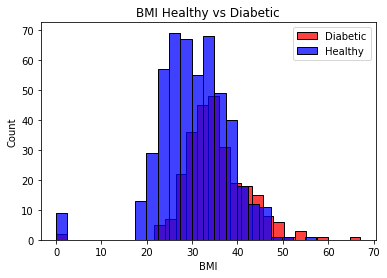

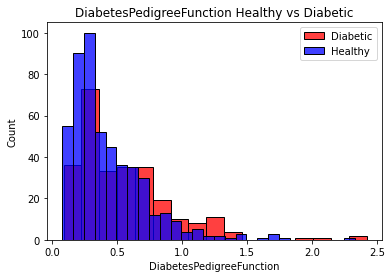

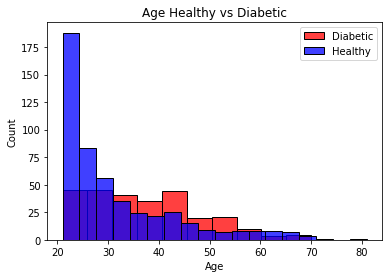

In [12]:
att = data.columns.to_list()
att.remove('Outcome')
for feature in att:
    diabetic = data.loc[data['Outcome'] == 1][feature]
    healthy = data.loc[data['Outcome'] == 0][feature]
    sns.histplot(diabetic, color='red')
    sns.histplot(healthy, color='blue')
    plt.title(f'{feature} Healthy vs Diabetic')
    plt.legend(['Diabetic', 'Non-Diabetic'])
    plt.show()

Heat Map for all data

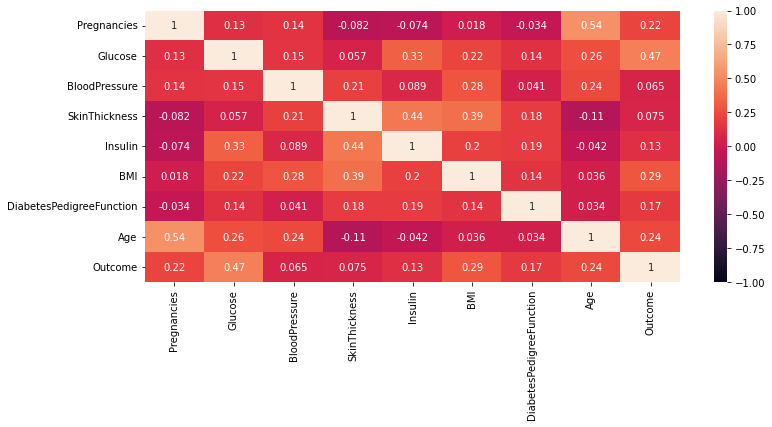

In [13]:
plt.figure(figsize = (12,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

<a id='pre'></a>
## Build a Prediction Model


Scaling Data

In [14]:
y=data['Outcome']
X=data.drop(['Outcome'],axis=1)
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)
s_data=pd.DataFrame(X_scaled,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
s_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


Splitting data into train and test

In [15]:
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_train,X_test,y_train,y_test=model_selection.train_test_split(s_data,y,test_size=0.33,random_state=42)

## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

# Logistic Regression

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [18]:
print(confusion_matrix(y_test,y_pred))

[[136  32]
 [ 34  52]]


In [19]:
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression()
lg_params=[{'C':[0.001,0.01,0.1,1,10,100,1000],'max_iter':[20,50,100,200,500,1000]}]
gscv=GridSearchCV(logreg,lg_params,cv=10)
gscv.fit(X_train,y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 0.1, 'max_iter': 20}
0.7762443438914026


In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
logreg_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
logreg_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
logreg_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {logreg_pr_score:.2f}, Recall: {logreg_rc_score:.2f}, Accuracy: {logreg_ac_score:.2f}')

Precision: 0.62, Recall: 0.60, Accuracy: 0.74


# KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
knn_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
knn_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
knn_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {knn_pr_score:.2f}, Recall: {knn_rc_score:.2f}, Accuracy: {knn_ac_score:.2f}')

Precision: 0.44, Recall: 0.43, Accuracy: 0.62


In [22]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred= knn.predict(X_test)
  error_rate.append(np.mean(y_pred != y_test))
best_k=error_rate.index(min(error_rate))+1
print("Best k : "+ str(best_k))
print("With error "+ str(min(error_rate)))

Best k : 36
With error 0.24803149606299213


In [23]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train) 
y_pred = knn.predict(X_test)
knn_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
knn_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
knn_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {knn_pr_score:.2f}, Recall: {knn_rc_score:.2f}, Accuracy: {knn_ac_score:.2f}')

Precision: 0.71, Recall: 0.45, Accuracy: 0.75


In [24]:
print(confusion_matrix(y_test, y_pred))

[[152  16]
 [ 47  39]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       168
           1       0.71      0.45      0.55        86

    accuracy                           0.75       254
   macro avg       0.74      0.68      0.69       254
weighted avg       0.75      0.75      0.74       254



# Decision Tree

In [26]:
dtree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,6,10,20,100,200]
parameters = dict(criterion=criterion, max_depth=max_depth)
grid_search = GridSearchCV(dtree, parameters, scoring='accuracy',cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20, 100, 200]},
             scoring='accuracy')

In [27]:
print('Best Criterion:', grid_search.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 6


In [28]:
dtree = DecisionTreeClassifier(criterion= grid_search.best_estimator_.get_params()['criterion'],max_depth= grid_search.best_estimator_.get_params()['max_depth'])
dtree = dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
dt_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
dt_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
dt_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {dt_pr_score:.2f}, Recall: {dt_rc_score:.2f}, Accuracy: {dt_ac_score:.2f}')

Precision: 0.56, Recall: 0.72, Accuracy: 0.72


In [29]:
print(confusion_matrix(y_test, y_pred))

[[120  48]
 [ 24  62]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       168
           1       0.56      0.72      0.63        86

    accuracy                           0.72       254
   macro avg       0.70      0.72      0.70       254
weighted avg       0.74      0.72      0.72       254



# SVM

In [31]:
from sklearn import svm
models = (9 * (9 - 1)) / 2

In [32]:
SVM_clf=svm.SVC()
SVM_clf.fit(X_train, y_train)
y_pred=SVM_clf.predict(X_test)
SVM_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
SVM_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
SVM_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {SVM_pr_score:.2f}, Recall: {SVM_rc_score:.2f}, Accuracy: {SVM_ac_score:.2f}')

Precision: 0.66, Recall: 0.58, Accuracy: 0.76


In [33]:
SVM_clf=svm.SVC()
parameters = [{'C': [1,50,10,150,100], 'kernel': ['sigmoid','linear','rbf']}]
grid_search = GridSearchCV(estimator= SVM_clf,param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train, y_train)
print('Best C:', grid_search.best_estimator_.get_params()['C'])
print('Best kernel:', grid_search.best_estimator_.get_params()['kernel'])

Best C: 1
Best kernel: linear


In [34]:
SVM_clf=svm.SVC(C=grid_search.best_estimator_.get_params()['C'],kernel=grid_search.best_estimator_.get_params()['kernel'])
SVM_clf.fit(X_train,y_train)
y_pred = SVM_clf.predict(X_test)
SVM_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
SVM_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
SVM_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {SVM_pr_score:.2f}, Recall: {SVM_rc_score:.2f}, Accuracy: {SVM_ac_score:.2f}')

Precision: 0.64, Recall: 0.62, Accuracy: 0.75


In [35]:
print(confusion_matrix(y_test, y_pred))

[[138  30]
 [ 33  53]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



# RF

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))

[[136  32]
 [ 36  50]]


In [39]:
rf_pr_score = precision_score(y_true=y_test, y_pred=y_pred)
rf_rc_score = recall_score(y_true=y_test, y_pred=y_pred)
rf_ac_score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precision: {rf_pr_score:.2f}, Recall: {rf_rc_score:.2f}, Accuracy: {rf_ac_score:.2f}')

Precision: 0.61, Recall: 0.58, Accuracy: 0.73


In [40]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       168
           1       0.61      0.58      0.60        86

    accuracy                           0.73       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.73      0.73       254



<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!


In [41]:
data_final=[['RF',rf_pr_score,rf_rc_score,rf_ac_score],['SVM',SVM_pr_score,SVM_rc_score,SVM_ac_score],['DT',dt_pr_score,dt_rc_score,dt_ac_score],['KNN',knn_pr_score,knn_rc_score,knn_ac_score],['LR',logreg_pr_score,logreg_rc_score,logreg_ac_score]]
df = pd.DataFrame(data_final, columns = ['Classifier', 'Precision','Recall','Accuracy'])
df

,Classifier,Precision,Recall,Accuracy
0,RF,0.609756,0.581395,0.732283
1,SVM,0.638554,0.616279,0.751969
2,DT,0.563636,0.720930,0.716535
3,KNN,0.709091,0.453488,0.751969
4,LR,0.619048,0.604651,0.740157


Overall RF is the best model when it comes to precision, recall and accuracy is **RF**